# **Exploratory Data Analysis (EDA)**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/DatasetUASFiltered.csv')
data.head()


FileNotFoundError: ignored

## **Display Wordcloud**

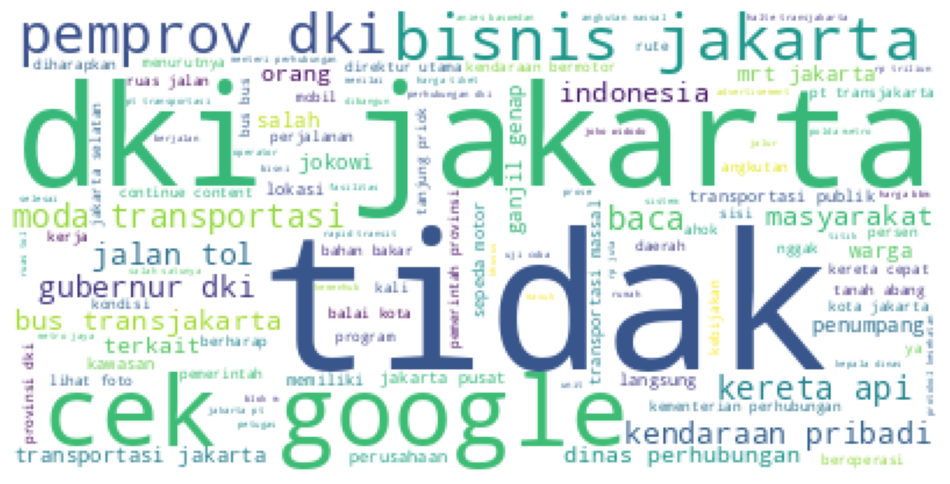

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = "white").generate(' '.join(data['stemmed']))

#Plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

#To remove the axis value
plt.axis("off")
plt.show()

## **Visualize Top Words**

In [ ]:
def get_corpus(series):
    words = []
    for text in series:
        for word in text.split():
            words.append(word.strip())
    return words

corpus = get_corpus(data['no_stopwords'])
corpus[:5]

['gedung', 'jakarta', 'wajib', 'pasang', 'charger']

In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'jakarta': 30117,
 'transportasi': 17812,
 'bus': 14499,
 'tidak': 12778,
 'jalan': 11825,
 'dki': 10627,
 'kota': 10580,
 'angkutan': 10095,
 'kendaraan': 9180,
 'transjakarta': 8239}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n,g):
    vec = CountVectorizer(ngram_range=(1, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

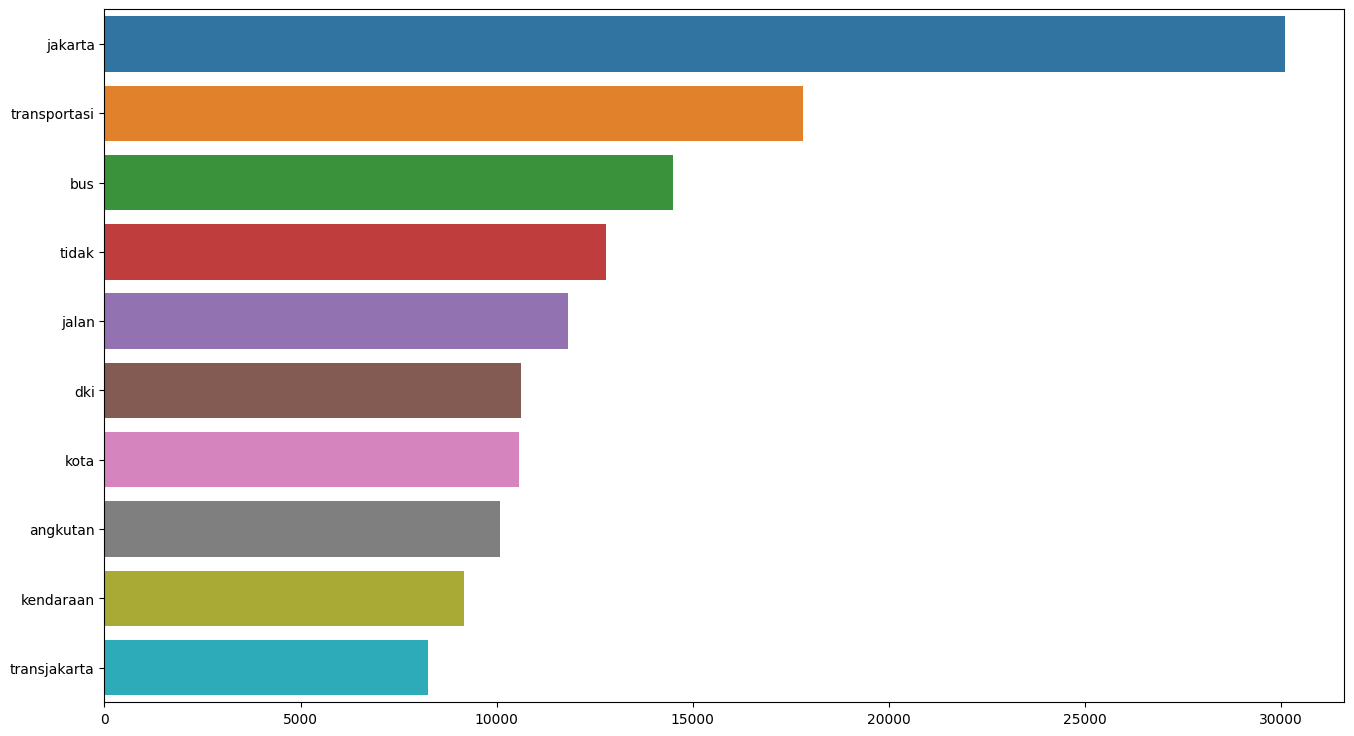

In [ ]:
import seaborn as sns
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(corpus,10,2)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()));

# **Word Embedding BERT**

In [ ]:
jokowi = data[data["Era"] == "Jokowi"]["no_stopwords"].to_list()
anies = data[data["Era"] == "Anies"]["no_stopwords"].to_list()
ahok = data[data["Era"] == "Ahok"]["no_stopwords"].to_list()

In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.6 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=e0f2f20cc26b29d80e2b570d7532c327e8e5e13fe0c41c2a0687953bf957d4a9
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [ ]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

.gitattributes:   0%|          | 0.00/345 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/265M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
emb_jokowi = embedder.encode(jokowi)
emb_anies = embedder.encode(anies)
emb_ahok = embedder.encode(ahok)

# **KMeans with BERT**

### Jokowi

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 36
jokowi_model = KMeans(n_clusters = num_clusters)
jokowi_model.fit(emb_jokowi)

jokowi_assignment = jokowi_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
jokowi_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(jokowi_assignment):
    jokowi_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(jokowi_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['budi', 'pusat', 'apartmemen', 'fokus', 'mengurangilah', 'cek', 'jakarta', 'langsung', 'kwok', 'spklu', 'viral', 'kci', 'berbasis', 'antusiasme', 'jenderal', '2', 'iimplementasi', 'korea', 'tender', 'kerja', 'investasi', 'mrt', 'ditargetkan']

Cluster  2
['kota', 'transportasi', 'terkait', 'bali', 'hendro', 'sugiatno', 'spklu', 'mayoritas', 'jakarta', 'meningkatkan', 'larangan', 'motor', 'jaya', 'splu', 'pln', 'solusi', 'alat', 'integrasi', 'karya', 'jakarta', 'teken', 'ketua', 'menolak', 'integrasi', 'tekannya', 'menyebut', 'dki', 'jakarta', 'pemprov', 'mrt', 'pemerintah', 'aprindy', 'patungan', 'linkedin', 'manajemen', 'nyaman', 'transportasi', 'teman', 'tertuang', 'barat', 'proyek', 'budi', 'investornya', 'statement', '24', '10', '2023', 'jakarta', '24', 'pembangunan']

Cluster  3
['listrik', 'kantor', 'ihwal', 'konsentrasi', 'catatan', 'registrasi', 'uji', 'populasi', 'sepeda', 'pakar', 'transportasi', 'pemerintah', 'jakarta', 'bogor', 'tangerang', 'perumahan', 'bisnis'

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score

# Data yang sudah di-cluster
j_predicted_labels = jokowi_model.fit_predict(emb_jokowi)

# Metrik Silhouette
j_silhouette_avg = silhouette_score(emb_jokowi, j_predicted_labels)
print(f"Silhouette Score: {j_silhouette_avg}")

# Metrik Davies-Bouldin
j_davies_bouldin_avg = davies_bouldin_score(emb_jokowi, j_predicted_labels)
print(f"Davies-Bouldin Score: {j_davies_bouldin_avg}")

# Metrik Calinski-Harabaz
j_calinski_avg = calinski_harabasz_score(emb_jokowi, j_predicted_labels)
print(f"Calinski-Harabasz Score: {j_calinski_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.022011572495102882
Davies-Bouldin Score: 3.2860468772689324
Calinski-Harabasz Score: 23.690714091298645


### Ahok

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 30
ahok_model = KMeans(n_clusters = num_clusters)
ahok_model.fit(emb_ahok)

ahok_assignment = ahok_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
ahok_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(ahok_assignment):
    ahok_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(ahok_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['spklu', 'pembangunan', 'edaran', 'kemenhub', 'kantor', 'spklu', 'jakarta', 'hendro', 'pemasangan', 'selasa', '11', 'spklu', '2022', 'pemerintah', 'dki', 'jakarta', 'ditambah', 'susah', '1', 'bpbd', 'menurutnya', 'persen', 'prioritas', 'dki', 'daerah', 'angka', 'pengembangan', 'pln', 'motor', 'motor', 'listrik', '2', 'dki', 'mengisi', 'energi', 'transisi', 'motor', 'charging', 'mobility', 'desain', 'daya', 'jam', 'fitur', 'alat', 'pengisi', 'daya', 'ekspos', 'baterai', 'mencapai', 'baterai', 'roadmap', 'kai', 'sulit', '1', 'proyek', 'pengelolaan', 'disesuaikan', 'instran', 'integrasi', 'yes', 'akuisisi', 'commuter', 'ngawur', 'syafrin', 'liputo', 'berupaya', 'anak', 'ngawur', 'transaksi', 'daerah', 'kci', 'mayoritas', 'jakarta', 'jakarta', 'dirut', 'mrt', 'menjabat', 'gubernur', 'kolaborasi', 'satunya', 'asyik', 'for', 'east', 'line', 'memperluas', 'meliputi', '3', 'negara', '1', 'bulus', 'pemerintah', 'jepang', 'mrt', 'transportasi', 'penyediaan']

Cluster  2
['pemerintah'

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score

# Data yang sudah di-cluster
ah_predicted_labels = ahok_model.fit_predict(emb_ahok)

# Metrik Silhouette
ah_silhouette_avg = silhouette_score(emb_ahok, ah_predicted_labels)
print(f"Silhouette Score: {ah_silhouette_avg}")

# Metrik Davies-Bouldin
ah_davies_bouldin_avg = davies_bouldin_score(emb_ahok, ah_predicted_labels)
print(f"Davies-Bouldin Score: {ah_davies_bouldin_avg}")

# Metrik Calinski-Harabaz
ah_calinski_avg = calinski_harabasz_score(emb_ahok, ah_predicted_labels)
print(f"Calinski-Harabasz Score: {ah_calinski_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.019744230434298515
Davies-Bouldin Score: 3.333553868955476
Calinski-Harabasz Score: 34.59717207169297


### Anies

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 30
anies_model = KMeans(n_clusters = num_clusters)
anies_model.fit(emb_anies)

anies_assignment = anies_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
anies_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(anies_assignment):
    anies_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(anies_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['pasang', 'bertingkat', 'edaran', 'listrik', 'siaran', 'ditjen', 'minggu', 'memasang', 'listrik', 'gubernur', 'pemasangan', 'dibangun', 'selasa', 'bisnis', 'anggaran', 'jabodetabek', 'dki', 'kebijakan', 'dihapuskan', 'pasalnya', 'thamrin', 'syafrin', 'timnya', 'mendorong', 'penuh', 'daya', 'baca', 'multi', 'fitur', 'ion', 'terintegrasi', 'mitj', 'akuisisi', 'dki', 'mitj', 'kemenhub', 'mudah', 'rencana', 'sanksi', 'teken', 'udah', 'disesuaikan', 'darmaningtyas', 'prinsipnya', 'instran', 'akuisisi', 'publik', 'pambagio', 'akuisisi', 'commuter', 'pemerintah', 'jakarta', 'agus', 'no', 'saham', 'mitj', 'teknis', 'jakarta', 'pengelolaan', '51', 'saham', 'dki', 'jakarta', 'mrt', 'komisaris', 'transit', 'pembangunan', 'keuangan', 'layanan', 'jelang', 'g20', 'fitur', 'mile', 'perjalanan', 'jakarta', 'kepala', 'barat', 'rencana', 'services', 'proyek', 'senin', 'kingdom', 'rencananya', 'bali', 'press', 'bandung', 'budi', 'massal', 'pemerintah', 'budi', 'indonesia', 'mou', 'menteri', '

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score

# Data yang sudah di-cluster
an_predicted_labels = anies_model.fit_predict(emb_anies)

# Metrik Silhouette
an_silhouette_avg = silhouette_score(emb_anies, an_predicted_labels)
print(f"Silhouette Score: {an_silhouette_avg}")

# Metrik Davies-Bouldin
an_davies_bouldin_avg = davies_bouldin_score(emb_anies, an_predicted_labels)
print(f"Davies-Bouldin Score: {an_davies_bouldin_avg}")

# Metrik Calinski-Harabaz
an_calinski_avg = calinski_harabasz_score(emb_anies, an_predicted_labels)
print(f"Calinski-Harabasz Score: {an_calinski_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.01916312612593174
Davies-Bouldin Score: 3.269813732937622
Calinski-Harabasz Score: 33.526345978344494


## **HDBSCAN With BERT**

In [ ]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 43.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039295 sha256=3c609e4fea00d9d687fb92949f4bf3dace4535890afa0d294e11c3d538b61f95
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.6
    Uninstalling Cython-3.0.6:
      Successfully uninstalled Cython-3.0.6


In [ ]:
from sklearn.decomposition import TruncatedSVD
import hdbscan
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, calinski_harabasz_score

In [ ]:
hdb = hdbscan.HDBSCAN(metric='euclidean')

### Jokowi

In [ ]:
jokowi_clusters = hdb.fit_predict(emb_jokowi)

# Metrik Silhouette
sil_j = silhouette_score(emb_jokowi, jokowi_clusters)
print("Silhouette Score: ", sil_j)

# Metrik Davies-Bouldin
davies_j = davies_bouldin_score(emb_jokowi, jokowi_clusters)
print(f"Davies-Bouldin Score: {davies_j}")

# Metrik Calinski-Harabaz
calinski_j = calinski_harabasz_score(emb_jokowi, jokowi_clusters)
print(f"Calinski-Harabasz Score: {calinski_j}")

no_clusters = len(np.unique(jokowi_clusters))
print(no_clusters)

jokowi_sentences = [[] for i in range(no_clusters)]
for sentence_id, cluster_id in enumerate(jokowi_clusters):
    jokowi_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(jokowi_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Silhouette Score:  0.10532472
Davies-Bouldin Score: 4.229692690715029
Calinski-Harabasz Score: 44.283835462274915
3
Cluster  1
['gedung', 'jakarta', 'pasang', 'mobil', 'listrik', 'bisnis', 'jakarta', 'kementerian', 'perhubungan', 'kemenhub', 'mendorong', 'pemerintah', 'provinsi', 'pemprov', 'dki', 'memperbanyak', 'stasiun', 'pengisian', 'kendaraan', 'spklu', 'charger', 'mobil', 'diwajibkan', 'gedung', 'gedung', 'bertingkat', 'direktur', 'sarana', 'transportasi', 'danto', 'restyawan', 'pemprov', 'menerbitkan', 'edaran', 'salah', 'upaya', 'percepatan', 'adopsi', 'kendaraan', 'listrik', 'dki', 'jakarta', 'edaran', 'pemprov', 'jakarta', 'terkait', 'spklu', 'diwajibkan', 'gedung', 'gedung', 'teman', 'teman', 'mudah', 'mengisi', 'daya', 'kendaraan', 'disiapkan', 'danto', 'acara', 'pameran', 'kendaraan', 'bermotor', 'berbasis', 'baterai', 'bali', 'dikutip', 'siaran', 'youtube', 'ditjen', 'perhubungan', 'darat', 'minggu', '11', '2022', 'baca', 'mobil', 'spklu', 'borobudur', 'setrum', 'motor', 

### Ahok

In [ ]:
ahok_clusters = hdb.fit_predict(emb_ahok)

# Metrik Silhouette
sil_ah = silhouette_score(emb_ahok, ahok_clusters)
print("Silhouette Score: ", sil_ah)

# Metrik Davies-Bouldin
davies_ah = davies_bouldin_score(emb_ahok, ahok_clusters)
print(f"Davies-Bouldin Score: {davies_ah}")

# Metrik Calinski-Harabaz
calinski_ah = calinski_harabasz_score(emb_ahok, ahok_clusters)
print(f"Calinski-Harabasz Score: {calinski_ah}")

no_clusters = len(np.unique(ahok_clusters))
print(no_clusters)

Silhouette Score:  0.081671596
Davies-Bouldin Score: 3.7701640611357874
Calinski-Harabasz Score: 41.9081767247081
3


### Anies

In [ ]:
anies_clusters = hdb.fit_predict(emb_anies)
no_clusters = len(np.unique(anies_clusters))
print(no_clusters)
# Metrik Silhouette
sil_an = silhouette_score(emb_anies, anies_clusters)
print("Silhouette Score: ", sil_an)

# Metrik Davies-Bouldin
davies_an = davies_bouldin_score(emb_anies, anies_clusters)
print(f"Davies-Bouldin Score: {davies_an}")

# Metrik Calinski-Harabaz
calinski_an = calinski_harabasz_score(emb_anies, anies_clusters)
print(f"Calinski-Harabasz Score: {calinski_an}")

4
Silhouette Score:  0.0290542
Davies-Bouldin Score: 3.719925122358776
Calinski-Harabasz Score: 27.70650606943455
